In [1]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
#style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras

import sys
sys.path.append("..")

import dataset, network, GPR_Model, prob_dist
import WGAN_Model

# please ensure the WGAN_Model.py is edited to use prediction on a
# non-fixed input, as by default the active function is for fixed input.

# Load data

In [2]:
# n_features = 4 

# data = pd.read_csv("../data/mtsdata.csv")
# print(data.head())

# x1, x2, x3 = np.array(data["Surface Area"]*1e13).reshape(-1,1), np.array(data["Concentration"]).reshape(-1,1), np.array(data["Time"]).reshape(-1,1)

# X_train = np.concatenate((x1, x2), axis=1)
# X_train = np.concatenate((X_train, x3), axis=1)
# y_train = np.array(data["Response"]).reshape(-1,1)

# X_test = np.concatenate((x1, x2), axis=1)
# X_test = np.concatenate((X_test, x3), axis=1)
# y_test = np.array(data["Response"]).reshape(-1,1)


In [3]:
# 2 n_features sets "sinus", "circle", "multi", "moons", "heter"
# 3 n_features sets "helix", "3d"

scenario = "heter"
n_instance = 300 # number of generated points
n_features = 2

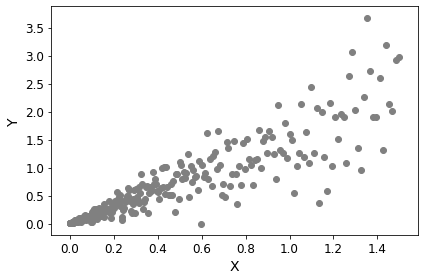

In [4]:
if scenario in ("3d", "helix") :
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.tight_layout()
    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='grey')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

# WGAN

### Preprocessing

In [5]:
wgan = WGAN_Model.WGAN(n_features)

In [6]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train)
test_dataset, scaler1, X_test_scaled = wgan.preproc(X_test, y_test)

every time the data shape (100, 2)
every time the data shape (100, 2)
every time the data shape (100, 2)
every time the data shape (100, 2)
every time the data shape (100, 2)
every time the data shape (100, 2)


### Training

In [7]:
hist = wgan.train(train_dataset, epochs=1000)

Epoch 0/1000
discriminator: -0.543379 - generator: -0.288305 - 4s
Epoch 1/1000
discriminator: -0.550982 - generator: -0.309226 - 0s
Epoch 2/1000
discriminator: -0.533986 - generator: -0.273953 - 0s
Epoch 3/1000
discriminator: -0.389937 - generator: -0.381653 - 0s
Epoch 4/1000
discriminator: -0.377193 - generator: -0.405674 - 0s
Epoch 5/1000
discriminator: -0.318310 - generator: -0.397757 - 0s
Epoch 6/1000
discriminator: -0.308372 - generator: -0.419018 - 0s
Epoch 7/1000
discriminator: -0.383242 - generator: -0.418004 - 0s
Epoch 8/1000
discriminator: -0.294895 - generator: -0.436050 - 0s
Epoch 9/1000
discriminator: -0.231600 - generator: -0.455382 - 0s
Epoch 10/1000
discriminator: -0.153961 - generator: -0.442279 - 0s
Epoch 11/1000
discriminator: -0.234970 - generator: -0.526144 - 0s
Epoch 12/1000
discriminator: -0.280676 - generator: -0.470922 - 0s
Epoch 13/1000
discriminator: -0.178190 - generator: -0.468863 - 0s
Epoch 14/1000
discriminator: -0.165044 - generator: -0.507113 - 0s
Epoch

discriminator: -0.044750 - generator: -0.714659 - 0s
Epoch 125/1000
discriminator: -0.045128 - generator: -0.732422 - 0s
Epoch 126/1000
discriminator: -0.007625 - generator: -0.700358 - 0s
Epoch 127/1000
discriminator: -0.012091 - generator: -0.737803 - 0s
Epoch 128/1000
discriminator: -0.032326 - generator: -0.705578 - 0s
Epoch 129/1000
discriminator: -0.028977 - generator: -0.726864 - 0s
Epoch 130/1000
discriminator: 0.002813 - generator: -0.707049 - 0s
Epoch 131/1000
discriminator: 0.026153 - generator: -0.713255 - 0s
Epoch 132/1000
discriminator: -0.015979 - generator: -0.719628 - 0s
Epoch 133/1000
discriminator: -0.017084 - generator: -0.694281 - 0s
Epoch 134/1000
discriminator: -0.016547 - generator: -0.701834 - 0s
Epoch 135/1000
discriminator: -0.020231 - generator: -0.690041 - 0s
Epoch 136/1000
discriminator: -0.013098 - generator: -0.696107 - 0s
Epoch 137/1000
discriminator: -0.046808 - generator: -0.696376 - 0s
Epoch 138/1000
discriminator: -0.028546 - generator: -0.729933 - 

discriminator: -0.090744 - generator: -0.719952 - 0s
Epoch 246/1000
discriminator: -0.100876 - generator: -0.707097 - 0s
Epoch 247/1000
discriminator: -0.118452 - generator: -0.739414 - 0s
Epoch 248/1000
discriminator: -0.117524 - generator: -0.722457 - 0s
Epoch 249/1000
discriminator: -0.106351 - generator: -0.711834 - 0s
Epoch 250/1000
discriminator: -0.112804 - generator: -0.719015 - 0s
Epoch 251/1000
discriminator: -0.103859 - generator: -0.727037 - 0s
Epoch 252/1000
discriminator: -0.128063 - generator: -0.714154 - 0s
Epoch 253/1000
discriminator: -0.113205 - generator: -0.718821 - 0s
Epoch 254/1000
discriminator: -0.109495 - generator: -0.727175 - 0s
Epoch 255/1000
discriminator: -0.111517 - generator: -0.744209 - 0s
Epoch 256/1000
discriminator: -0.087105 - generator: -0.732874 - 0s
Epoch 257/1000
discriminator: -0.137591 - generator: -0.738953 - 0s
Epoch 258/1000
discriminator: -0.116446 - generator: -0.724992 - 0s
Epoch 259/1000
discriminator: -0.127582 - generator: -0.708015 

discriminator: -0.144640 - generator: -0.825657 - 0s
Epoch 367/1000
discriminator: -0.150441 - generator: -0.843214 - 0s
Epoch 368/1000
discriminator: -0.119961 - generator: -0.831588 - 0s
Epoch 369/1000
discriminator: -0.136938 - generator: -0.860945 - 0s
Epoch 370/1000
discriminator: -0.206311 - generator: -0.861378 - 0s
Epoch 371/1000
discriminator: -0.162120 - generator: -0.818796 - 0s
Epoch 372/1000
discriminator: -0.172999 - generator: -0.825378 - 0s
Epoch 373/1000
discriminator: -0.205512 - generator: -0.830834 - 0s
Epoch 374/1000
discriminator: -0.152279 - generator: -0.876958 - 0s
Epoch 375/1000
discriminator: -0.161957 - generator: -0.817527 - 0s
Epoch 376/1000
discriminator: -0.165025 - generator: -0.845062 - 0s
Epoch 377/1000
discriminator: -0.191175 - generator: -0.835480 - 0s
Epoch 378/1000
discriminator: -0.194795 - generator: -0.840443 - 0s
Epoch 379/1000
discriminator: -0.181382 - generator: -0.871703 - 0s
Epoch 380/1000
discriminator: -0.161806 - generator: -0.850075 

discriminator: -0.192024 - generator: -0.765877 - 0s
Epoch 490/1000
discriminator: -0.181725 - generator: -0.788346 - 0s
Epoch 491/1000
discriminator: -0.071518 - generator: -0.749290 - 0s
Epoch 492/1000
discriminator: -0.113426 - generator: -0.764747 - 0s
Epoch 493/1000
discriminator: -0.122486 - generator: -0.772052 - 0s
Epoch 494/1000
discriminator: -0.132931 - generator: -0.737426 - 0s
Epoch 495/1000
discriminator: -0.172628 - generator: -0.710383 - 0s
Epoch 496/1000
discriminator: -0.182747 - generator: -0.796078 - 0s
Epoch 497/1000
discriminator: -0.132006 - generator: -0.790556 - 0s
Epoch 498/1000
discriminator: -0.122159 - generator: -0.776685 - 0s
Epoch 499/1000
discriminator: -0.121839 - generator: -0.781465 - 0s
Epoch 500/1000
discriminator: -0.132227 - generator: -0.733914 - 0s
Epoch 501/1000
discriminator: -0.182172 - generator: -0.748517 - 0s
Epoch 502/1000
discriminator: -0.119590 - generator: -0.701030 - 0s
Epoch 503/1000
discriminator: -0.164207 - generator: -0.751924 

discriminator: -0.040207 - generator: -0.664514 - 0s
Epoch 613/1000
discriminator: -0.022459 - generator: -0.690948 - 0s
Epoch 614/1000
discriminator: 0.117448 - generator: -0.688036 - 0s
Epoch 615/1000
discriminator: 0.129470 - generator: -0.689206 - 0s
Epoch 616/1000
discriminator: 0.126679 - generator: -0.678106 - 0s
Epoch 617/1000
discriminator: 0.108429 - generator: -0.710012 - 0s
Epoch 618/1000
discriminator: 0.083536 - generator: -0.701791 - 0s
Epoch 619/1000
discriminator: 0.119120 - generator: -0.797080 - 0s
Epoch 620/1000
discriminator: 0.064112 - generator: -0.751614 - 0s
Epoch 621/1000
discriminator: -0.002782 - generator: -0.668649 - 0s
Epoch 622/1000
discriminator: 0.127591 - generator: -0.682688 - 0s
Epoch 623/1000
discriminator: 0.163036 - generator: -0.784010 - 0s
Epoch 624/1000
discriminator: 0.052240 - generator: -0.704949 - 0s
Epoch 625/1000
discriminator: 0.072199 - generator: -0.681308 - 0s
Epoch 626/1000
discriminator: -0.004437 - generator: -0.705146 - 0s
Epoch 

discriminator: 0.262603 - generator: -0.501140 - 0s
Epoch 738/1000
discriminator: 0.221243 - generator: -0.570019 - 0s
Epoch 739/1000
discriminator: 0.198565 - generator: -0.560535 - 0s
Epoch 740/1000
discriminator: 0.242694 - generator: -0.557504 - 0s
Epoch 741/1000
discriminator: 0.245916 - generator: -0.525445 - 0s
Epoch 742/1000
discriminator: 0.238215 - generator: -0.507285 - 0s
Epoch 743/1000
discriminator: 0.269980 - generator: -0.535009 - 0s
Epoch 744/1000
discriminator: 0.261462 - generator: -0.493942 - 0s
Epoch 745/1000
discriminator: 0.222485 - generator: -0.544278 - 0s
Epoch 746/1000
discriminator: 0.262429 - generator: -0.524917 - 0s
Epoch 747/1000
discriminator: 0.250229 - generator: -0.544743 - 0s
Epoch 748/1000
discriminator: 0.264777 - generator: -0.487373 - 0s
Epoch 749/1000
discriminator: 0.241744 - generator: -0.541512 - 0s
Epoch 750/1000
discriminator: 0.265255 - generator: -0.537907 - 0s
Epoch 751/1000
discriminator: 0.298652 - generator: -0.494326 - 0s
Epoch 752/

discriminator: 0.259048 - generator: 0.134142 - 0s
Epoch 861/1000
discriminator: 0.266844 - generator: 0.135280 - 0s
Epoch 862/1000
discriminator: 0.370346 - generator: 0.178347 - 0s
Epoch 863/1000
discriminator: 0.325931 - generator: 0.140275 - 0s
Epoch 864/1000
discriminator: 0.280478 - generator: 0.172630 - 0s
Epoch 865/1000
discriminator: 0.365512 - generator: 0.161749 - 0s
Epoch 866/1000
discriminator: 0.299542 - generator: 0.238431 - 0s
Epoch 867/1000
discriminator: 0.271587 - generator: 0.165498 - 0s
Epoch 868/1000
discriminator: 0.264300 - generator: 0.114339 - 0s
Epoch 869/1000
discriminator: 0.371056 - generator: 0.229398 - 0s
Epoch 870/1000
discriminator: 0.343207 - generator: 0.245789 - 0s
Epoch 871/1000
discriminator: 0.239862 - generator: 0.301616 - 0s
Epoch 872/1000
discriminator: 0.319970 - generator: 0.329778 - 0s
Epoch 873/1000
discriminator: 0.217561 - generator: 0.263688 - 0s
Epoch 874/1000
discriminator: 0.299049 - generator: 0.305400 - 0s
Epoch 875/1000
discrimina

discriminator: 0.354049 - generator: 0.250383 - 0s
Epoch 988/1000
discriminator: 0.351468 - generator: 0.280385 - 0s
Epoch 989/1000
discriminator: 0.350273 - generator: 0.209643 - 0s
Epoch 990/1000
discriminator: 0.409247 - generator: 0.237954 - 0s
Epoch 991/1000
discriminator: 0.322207 - generator: 0.197459 - 0s
Epoch 992/1000
discriminator: 0.470840 - generator: 0.228987 - 0s
Epoch 993/1000
discriminator: 0.443229 - generator: 0.228565 - 0s
Epoch 994/1000
discriminator: 0.442355 - generator: 0.271507 - 0s
Epoch 995/1000
discriminator: 0.479087 - generator: 0.297184 - 0s
Epoch 996/1000
discriminator: 0.475512 - generator: 0.263862 - 0s
Epoch 997/1000
discriminator: 0.434008 - generator: 0.211457 - 0s
Epoch 998/1000
discriminator: 0.461265 - generator: 0.226767 - 0s
Epoch 999/1000
discriminator: 0.404790 - generator: 0.194441 - 0s


Loss: 


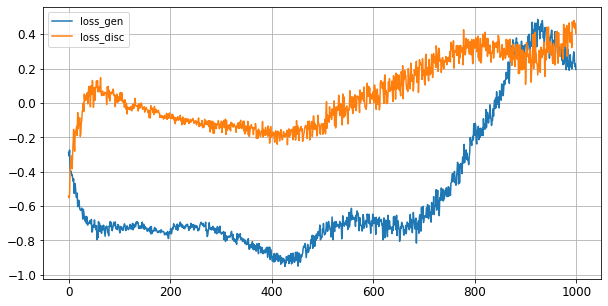

In [8]:
# plot loss
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'])
#ax.set_yscale('log')
ax.grid()
plt.show()

In [ ]:
X_generated = wgan.predict(X_test_scaled, scaler)

Optimizing latent space for point  0  /  300
Optimizing latent space for point  1  /  300
Optimizing latent space for point  2  /  300
Optimizing latent space for point  3  /  300
Optimizing latent space for point  4  /  300
Optimizing latent space for point  5  /  300
Optimizing latent space for point  6  /  300
Optimizing latent space for point  7  /  300
Optimizing latent space for point  8  /  300
Optimizing latent space for point  9  /  300
Optimizing latent space for point  10  /  300
Optimizing latent space for point  11  /  300
Optimizing latent space for point  12  /  300
Optimizing latent space for point  13  /  300
Optimizing latent space for point  14  /  300
Optimizing latent space for point  15  /  300
Optimizing latent space for point  16  /  300
Optimizing latent space for point  17  /  300
Optimizing latent space for point  18  /  300
Optimizing latent space for point  19  /  300
Optimizing latent space for point  20  /  300
Optimizing latent space for point  21  /  30

# Gaussian Process Regression

In [ ]:
ypred_GPR = GPR_Model.train(X_train, y_train, X_test, n_features)

# Comparison

### Prediction Plots

In [ ]:
# generates the plots
if scenario in ("3d", "helix"):
    fig = plt.figure(figsize=(13, 4))

    #---- First subplot
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    ax.scatter(X_test[:,0], X_test[:,1], y_test, color='orange')
    ax.set_title("Sample Data")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_zlim(0,7)

    ax = fig.add_subplot(1, 3, 2, projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], color='green', label='Generated Data')
    ax.set_title("WGAN-GP Predictions")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_zlim(0,7)

    ax = fig.add_subplot(1, 3, 3, projection='3d')
    ax.scatter(X_test[:,0], X_test[:,1], ypred_GPR, c='b', label='Generated Data')
    ax.set_title("GPR Predictions")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_zlim(0,7)
    
    plt.tight_layout(pad=-1, w_pad=0.8, h_pad=0)
    

else:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)
    axes[0].scatter(X_test, y_test, label='Real Data', color='orange')
    axes[0].set_title("Sample Data")
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y")

    axes[1].scatter(X_generated[:,0], X_generated[:,1], label="Generated Data by WGAN-GP", color='green')
    axes[1].set_title("WGAN-GP Predictions")
    axes[1].set_xlabel("x")

    axes[2].scatter(X_test, ypred_GPR, label='Generated Data by GPR')
    axes[2].set_title("GPR Predictions")
    axes[2].set_xlabel("x")

### Probability Density Plots

In [ ]:
sns.distplot(y_train, hist=False, label='True')
sns.distplot(ypred_GPR, hist=False, label='GPR')
sns.distplot(X_generated[:,1], hist=False, label='GAN Generated')
plt.xlabel("Y")
plt.ylabel("Probability Density")
plt.legend(loc='best');

In [ ]:
# user inputs
values = [-0,0.75,1.25] # input values
bounds = 0.05 # determine interval size

# for graph axis
x_min = -1
x_max = 4

In [ ]:
# generating the plots
if scenario in ("3d", "helix"):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)

    input_y = prob_dist.y2_values(X_test[:,0], X_test[:,1], y_test, values[0], bounds)
    wgan_y = prob_dist.y2_values(X_generated[:,0], X_generated[:,1], X_generated[:,2], values[0], bounds)
    gpr_y = prob_dist.y2_values(X_test[:,0], X_test[:,1], ypred_GPR, values[0], bounds)

    sns.kdeplot(input_y, bw=.2, label='True', color="orange", ax=ax1, shade=True)
    sns.kdeplot(wgan_y, bw=.2, label='WGAN-GP', color="green", ax=ax1)
    sns.kdeplot(gpr_y, bw=.2, label='GPR', color="blue", ax=ax1)
    ax1.set_title("Probability Density at x & y = %1.2f" %values[0] + "±%1.2f" %bounds)
    ax1.set_xlabel("Z")
    ax1.set_ylabel("Probability Density")
    ax1.set_xlim(x_min, x_max)

    input_y = prob_dist.y2_values(X_test[:,0], X_test[:,1], y_test, values[1], bounds)
    wgan_y = prob_dist.y2_values(X_generated[:,0], X_generated[:,1], X_generated[:,2], values[1], bounds)
    gpr_y = prob_dist.y2_values(X_test[:,0], X_test[:,1], ypred_GPR, values[1], bounds)

    sns.kdeplot(input_y, bw=.2, label='True', color="orange", ax=ax2, shade=True)
    sns.kdeplot(wgan_y, bw=.2, label='WGAN-GP', color="green", ax=ax2)
    sns.kdeplot(gpr_y, bw=.2, label='GPR', color="blue", ax=ax2)
    ax2.set_title("Probability Density at x & y = %1.2f" %values[1] + "±%1.2f" %bounds)
    ax2.set_xlabel("Z")
    ax2.set_xlim(x_min, x_max)

    input_y = prob_dist.y2_values(X_test[:,0], X_test[:,1], y_test, values[2], bounds)
    wgan_y = prob_dist.y2_values(X_generated[:,0], X_generated[:,1], X_generated[:,2], values[2], bounds)
    gpr_y = prob_dist.y2_values(X_test[:,0], X_test[:,1], ypred_GPR, values[2], bounds)

    sns.kdeplot(input_y, bw=.2, label='True', color="orange", ax=ax3, shade="fill")
    sns.kdeplot(wgan_y, bw=.2, label='WGAN-GP', color="green", ax=ax3)
    sns.kdeplot(gpr_y, bw=.2, label='GPR', color="blue", ax=ax3)
    ax3.set_title("Probability Density at x & y = %1.2f" %values[2] + "±%1.2f" %bounds)
    ax3.set_xlabel("Z")
    ax3.set_xlim(x_min, x_max)

else:
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)

    wgan_y = prob_dist.y_values(X_generated[:,0], X_generated[:,1], values[0], bounds)
    input_y = prob_dist.y_values(X_test, y_test, values[0], bounds)
    gpr_y = prob_dist.y_values(X_test, ypred_GPR, values[0], bounds
                                  )
    sns.kdeplot(input_y, bw=.2, label='True', color="orange", ax=ax1, shade="fill")
    sns.kdeplot(wgan_y, bw=.2, label='WGAN-GP', color="green", ax=ax1)
    sns.kdeplot(gpr_y, bw=.2, label='GPR', color="blue", ax=ax1)
    ax1.set_title("Probability Density at x = %1.2f" %values[0] + "±%1.2f" %bounds)
    ax1.set_xlabel("Y")
    ax1.set_ylabel("Probability Density")
    ax1.set_xlim(x_min, x_max)

    wgan_y = prob_dist.y_values(X_generated[:,0], X_generated[:,1], values[1], bounds)
    input_y = prob_dist.y_values(X_test, y_test, values[1], bounds)
    gpr_y = prob_dist.y_values(X_test, ypred_GPR, values[1], bounds
                                  )
    sns.kdeplot(input_y, bw=.2, label='True', color="orange", ax=ax2, shade="fill")
    sns.kdeplot(wgan_y, bw=.2, label='WGAN-GP', color="green", ax=ax2)
    sns.kdeplot(gpr_y, bw=.2, label='GPR', color="blue", ax=ax2)
    ax2.set_title("Probability Density at x = %1.2f" %values[1] + "±%1.2f" %bounds)
    ax2.set_xlabel("Y")
    ax2.set_xlim(x_min, x_max)

    wgan_y = prob_dist.y_values(X_generated[:,0], X_generated[:,1], values[2], bounds)
    input_y = prob_dist.y_values(X_test, y_test, values[2], bounds)
    gpr_y = prob_dist.y_values(X_test, ypred_GPR, values[2], bounds
                                  )
    sns.kdeplot(input_y, bw=.2, label='True', color="orange", ax=ax3, shade="fill")
    sns.kdeplot(wgan_y, bw=.2, label='WGAN-GP', color="green", ax=ax3)
    sns.kdeplot(gpr_y, bw=.2, label='GPR', color="blue", ax=ax3)
    ax3.set_title("Probability Density at x = %1.2f" %values[2] + "±%1.2f" %bounds)
    ax3.set_xlabel("Y")
    ax3.set_xlim(x_min, x_max)